# Proyecto de análisis de datos

### Autor: Luis Fernando Apáez Álvarez


#### Contenido

<ul>
    <a href="#p1"><li>Descripción</li></a>
    <a href="#p2"><li>Limpieza de datos</li></a>
    <a href="#p3"><li>Analizando la información</li></a>
    <ul>
        <a href="#p31"><li>Parte uno: Taller</li></a>
        <a href="#p32"><li>Parte dos: Secuencia didáctica</li></a>
        <a href="#p33"><li>Parte tres: análisis global</li></a>
        <a href="#p34"><li>Parte cuatro: asistencias</li></a>
    </ul>
    <a href="#p4"><li>Conclusiones</li></a>
    <a href="#p5"><li>Exportaciones</li></a>
</ul>

## Descripción <a id="p1"></a>

### Recapitulación de la información <a id="p1"></a>

Dentro de este proyecto iremos trabajando paso a paso enfocándonos en el análisis de datos.

La información con la que trabajaremos corresponde a los datos generados en la primer semana del curso propedéutico 2023-1 impartido por la Facultad de Ciencias de la UNAM. Dentro de dicho curso se dieron diferentes talleres de diferentes temas.

Ahora bien, para la información recopilada consideraremos dos archivos csv:

* **Encuestas**: Recopila información sobre los diferentes talleres brindados, donde las preguntas evalúan qué tan claro fue la exposición de los temas, el lenguaje que se ocupó, etcétera. De manera global las encuestas evalúan los talleres. Además, el curso estuvo conformado por talleres, donde se veían los temas de una manera intuitiva y sencilla, y por secuencias didácticas (SD), donde se veían los temas del taller pero de una manera más especifica y técnica. En las encuestas se evalúan tanto los talleres como las SD's.

* **Asistencias**: Recopila la asistencia de los participantes del curso propedéutico en la primer semana del curso (es decir, recopila las asistencias de 5 días).

Con base en lo anterior, es natural enfocar nuestro análisis de datos en ver las evaluaciones que se les dieron a cada uno de los talleres, o ver de manera global la evalución conjunta de todos los talleres para determinar una evalución general al curso propedéutico. Podremos ver también cuáles fueron los aspectos (o preguntas de la encuesta) que obtuvieron mejor o peor respuesta; por ejemplo, si logramos identificar las preguntas de la encuesta que obtuvieron peor respuesta, se puede enfocar más en dicho tema o abordarlo de una manera distinta en los siguientes cursos propedéuticos. En teoría, cada participante debía responder sólo una vez la encuesta en dicha primer semana.

Asimismo, podemos ver el comportamiento de los participantes entorno a sus asistencias. Por ejemplo, puede ser que el día viernes asistieron menos participantes a los talleres respecto a los demás días, o tal vez, el día en que asistieron más participantes fue, justamente, el primer día del curso (lunes). Lo anterior podremos responderlo de una manera certera.

Así, lo dicho antes representa el punto de partida y el camino que debemos seguir respecto a nuestro análisis de datos.

Comenzamos entonces por cargar los datos:

In [102]:
# Librerias que ocuparemos
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Cargaremos el archivo Encuestas.csv de la web y lo convertiremos
# en un dataframe denominado encuestas
encuestas = pd.read_csv('https://cursopypagina.github.io/CursoPy/Encuestas.csv')

# Vemos los primeros registros
encuestas.head(2)

,Unnamed: 0,Marca temporal,Dirección de correo electrónico,Escribe el nombre del taller,El lenguaje de los taller fue adecuado,Se distinguió los objetivos del taller,Fueron claras las instrucciones de los talleres,¿Qué tan ameno te pareció el taller?,Los talleres te motivaron a seguir indagando en el tema,Si tienes comentarios y/o sugerencias acerca de los talleres son bienvenidos.,El lenguaje de las secuencias didácticas te pareció apropiado,Se distinguió los objetivos de las secuencias didácticas,Fueron claros los conceptos que se formalizaron en las secuencias didácticas,¿Qué tan complicado te pareció la formalización de los conceptos en las secuencias didácticas?,¿Qué tan apropiado fue introducir los conceptos formales a partir de los talleres?,Si tienes comentarios y/o sugerencias son bienvenidos,El lenguaje de los talleres fue adecuado,Se distinguieron los objetivos del taller
0,0,21/07/2022 9:16:50,NaN,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,1,1,2,Sería bueno si pudieran sugerir bibliografía ú...,Mucho,Mucho,Mucho,Poco,Poco,.,NaN,NaN
1,1,21/07/2022 9:18:07,NaN,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,2,1,1,"En general el taller fue ameno, la actividad d...",Mucho,Mucho,Mucho,Mucho,Mucho,"No tengo mucho que agregar, me pareció bastant...",NaN,NaN


## Limpieza de datos <a id="p2"></a>

Lo que haremos será quedarnos, en principio, con las columnas relevantes para el análisis. Para un mejor manejo de las columnas, las cuales tienen preguntas, manejaremos números de columnas: 

In [103]:
# nombres de las columnas
col_names = encuestas.columns.to_list()

# diccionario vacio que almacenara la informacion:
# numero de columna: nombre completo de la columna
columnas_claves = {}

for i in range(len(col_names)):
    columnas_claves[i] = col_names[i] 
    
# veamos
columnas_claves

{0: 'Unnamed: 0',
 1: 'Marca temporal',
 2: 'Dirección de correo electrónico',
 3: 'Escribe el nombre del taller ',
 4: 'El lenguaje de los taller fue adecuado ',
 5: 'Se distinguió los objetivos del taller',
 6: 'Fueron claras las instrucciones de los talleres',
 7: '¿Qué tan ameno te pareció el taller?',
 8: 'Los talleres te motivaron a seguir indagando en el tema',
 9: 'Si tienes comentarios y/o sugerencias acerca de los talleres son bienvenidos.',
 10: 'El lenguaje de las secuencias didácticas te pareció apropiado',
 11: 'Se distinguió los objetivos de las secuencias didácticas',
 12: 'Fueron claros los conceptos que se formalizaron en las secuencias didácticas',
 13: '¿Qué tan complicado te pareció la formalización de los conceptos en las secuencias didácticas?',
 14: '¿Qué tan apropiado fue introducir los conceptos formales a partir de los talleres?',
 15: 'Si tienes comentarios y/o sugerencias son bienvenidos',
 16: 'El lenguaje de los talleres fue adecuado ',
 17: 'Se distingui

In [104]:
# cambiamos el nombre de las columnas
encuestas.columns = range(len(col_names))
encuestas.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,21/07/2022 9:16:50,NaN,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,1,1,2,Sería bueno si pudieran sugerir bibliografía ú...,Mucho,Mucho,Mucho,Poco,Poco,.,NaN,NaN
1,1,21/07/2022 9:18:07,NaN,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,2,1,1,"En general el taller fue ameno, la actividad d...",Mucho,Mucho,Mucho,Mucho,Mucho,"No tengo mucho que agregar, me pareció bastant...",NaN,NaN


Nos quedaremos con las columnas de la 3 a la 14, excluyendo la columna 9:

In [105]:
encuestas = encuestas.loc[:, [i for i in range(3,15) if i != 9]]
encuestas

,3,4,5,6,7,8,10,11,12,13,14
0,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,1,1,2,Mucho,Mucho,Mucho,Poco,Poco
1,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,2,1,1,Mucho,Mucho,Mucho,Mucho,Mucho
2,Serpientes estocásticas y escaleras aleatorias,5.0,5.0,5,5,4,Mucho,Mucho,Mucho,Mucho,Mucho
3,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
4,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
...,...,...,...,...,...,...,...,...,...,...,...
140,Maquina para transformar cafe en teoremas,1.0,1.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
141,TOROS Y VACAS,1.0,1.0,1,1,1,Mucho,Mucho,Mucho,Mucho,Mucho
142,maquina para transformar café en teoremas,1.0,2.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
143,Maquina para transformar café en teoremas,1.0,1.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho


In [5]:
encuestas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3       145 non-null    object 
 1   4       133 non-null    float64
 2   5       133 non-null    float64
 3   6       145 non-null    int64  
 4   7       145 non-null    int64  
 5   8       145 non-null    int64  
 6   10      145 non-null    object 
 7   11      145 non-null    object 
 8   12      145 non-null    object 
 9   13      145 non-null    object 
 10  14      145 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 12.6+ KB


convertiremos las columnas 4 y 5 en enteros (``int64``) y las columnas 10-14 cambiaremos la etiqueta ``Mucho`` por 1 y ``Poco`` por 0. Antes de ello, notemos que dichas columnas tienen asociados valores nulos

In [106]:
encuestas[(encuestas[4].isna()) & (encuestas[5].isna())]

,3,4,5,6,7,8,10,11,12,13,14
21,Juntos con Conujntos,NaN,NaN,1,1,2,Mucho,Mucho,Mucho,Mucho,Mucho
22,Juntos con conjuntos,NaN,NaN,1,1,2,Mucho,Mucho,Mucho,Poco,Mucho
23,juntos con conjuntos,NaN,NaN,1,2,3,Mucho,Mucho,Mucho,Poco,Mucho
24,Juntos con conjuntos,NaN,NaN,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
25,Juntos con Conjuntos,NaN,NaN,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
26,Junto con Conjuntos,NaN,NaN,1,1,1,Mucho,Mucho,Mucho,Poco,Poco
27,Juntos con Conjuntos,NaN,NaN,2,1,1,Mucho,Mucho,Mucho,Poco,Mucho
28,Juntos con conjuntos,NaN,NaN,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
29,Conjuntos ?,NaN,NaN,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
30,Juntos con conjuntos,NaN,NaN,1,3,3,Mucho,Poco,Mucho,Poco,Poco


donde no podremos eliminar dichas filas debido a que en las demás columnas sí tenemos información rescatable. Lo que haremos será colocar en vez de ``NaN`` el valor de 6.

In [107]:
# cambiamos los na's por el numero 6
encuestas = encuestas.fillna(6)

# vemos que ya no tenemos valores nulos
encuestas[(encuestas[4].isna()) & (encuestas[5].isna())]

,3,4,5,6,7,8,10,11,12,13,14


In [8]:
# observamos el cambio hecho
encuestas[(encuestas[4]==6) & (encuestas[5]==6)]

,3,4,5,6,7,8,10,11,12,13,14
21,Juntos con Conujntos,6.0,6.0,1,1,2,Mucho,Mucho,Mucho,Mucho,Mucho
22,Juntos con conjuntos,6.0,6.0,1,1,2,Mucho,Mucho,Mucho,Poco,Mucho
23,juntos con conjuntos,6.0,6.0,1,2,3,Mucho,Mucho,Mucho,Poco,Mucho
24,Juntos con conjuntos,6.0,6.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
25,Juntos con Conjuntos,6.0,6.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
26,Junto con Conjuntos,6.0,6.0,1,1,1,Mucho,Mucho,Mucho,Poco,Poco
27,Juntos con Conjuntos,6.0,6.0,2,1,1,Mucho,Mucho,Mucho,Poco,Mucho
28,Juntos con conjuntos,6.0,6.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
29,Conjuntos ?,6.0,6.0,1,1,1,Mucho,Mucho,Mucho,Poco,Mucho
30,Juntos con conjuntos,6.0,6.0,1,3,3,Mucho,Poco,Mucho,Poco,Poco


Ahora sí podemos cambiar el tipo de dato de dichas columnas a ``int64``

In [108]:
encuestas[4] = encuestas[4].astype("int64")
encuestas[5] = encuestas[5].astype("int64")

encuestas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   3       145 non-null    object
 1   4       145 non-null    int64 
 2   5       145 non-null    int64 
 3   6       145 non-null    int64 
 4   7       145 non-null    int64 
 5   8       145 non-null    int64 
 6   10      145 non-null    object
 7   11      145 non-null    object
 8   12      145 non-null    object
 9   13      145 non-null    object
 10  14      145 non-null    object
dtypes: int64(5), object(6)
memory usage: 12.6+ KB


Luego, cambiamos las etiquetas de las columnas 10-14

In [109]:
for i in range(10, 15):
    display(encuestas[i].value_counts())

Mucho    145
Name: 10, dtype: int64

Mucho    138
Poco       7
Name: 11, dtype: int64

Mucho    141
Poco       4
Name: 12, dtype: int64

Poco     114
Mucho     31
Name: 13, dtype: int64

Mucho    132
Poco      13
Name: 14, dtype: int64

In [110]:
def cambio_etiqueta(x):
    """Función para realizar el cambio de etiqueta"""
    if x == "Mucho":
        return 1
    elif x == "Poco":
        return 0

# realizamos el cambio pertinente
for i in range(10,15):
    encuestas[i] = encuestas[i].apply(lambda x: cambio_etiqueta(x))
    
# veamos
encuestas[[i for i in range(10, 15)]]

,10,11,12,13,14
0,1,1,1,0,0
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,0,1
4,1,1,1,0,1
...,...,...,...,...,...
140,1,1,1,0,1
141,1,1,1,1,1
142,1,1,1,0,1
143,1,1,1,0,1


In [111]:
for i in range(10, 15):
    display(encuestas[i].value_counts())

1    145
Name: 10, dtype: int64

1    138
0      7
Name: 11, dtype: int64

1    141
0      4
Name: 12, dtype: int64

0    114
1     31
Name: 13, dtype: int64

1    132
0     13
Name: 14, dtype: int64

In [13]:
# damos un vistazo al dataframe completo
encuestas.head(2)

,3,4,5,6,7,8,10,11,12,13,14
0,Serpientes estocásticas y escaleras aleatorias,1,1,1,1,2,1,1,1,0,0
1,Serpientes estocásticas y escaleras aleatorias,1,1,2,1,1,1,1,1,1,1


Veamos ahora los nombres de los talleres (columna 3)

In [14]:
encuestas[3].unique()

array(['Serpientes estocásticas y escaleras aleatorias',
       'Serpientes estocásticas y escaleras aleatorias.',
       'Lógica y sudokus', 'Lógica, sudokus y...¿demostraciones?',
       'Cartas en Set', 'Sudoku', 'Bingo del multiverso ',
       ' Bingo del Multiverso. ', 'Bingo del Multiverso',
       'Bingo del Multiverso ', 'Bingo del multiverso',
       'bingo del multiiverso', 'Curso Propedeutico',
       'Juntos con Conujntos', 'Juntos con conjuntos',
       'juntos con conjuntos ', 'Juntos con Conjuntos',
       'Junto con Conjuntos', 'Juntos con conjuntos ', 'Conjuntos ?',
       'Probabilidad ', 'Carrera de probabilidades con Mario Kart',
       'carrera de probabilidades con Mario Kart ',
       'Carrera de probabilidad con Mario Kart',
       'Carrera de Probabilidades', 'Carrera de Probabilidad',
       'Mario Kart y probabilidades ',
       'Carrera de Probabilidades con Mario Kart.',
       'carrera de probabilidades con Mario kart ',
       'Los caminos del infinito (n

notamos que hay varias maneras de nombrar un taller, lo cual no queremos. Realizaremos una limpieza en dichas cadenas de texto:

In [112]:
# importacion necesaria
import re

# diccionario que utilizaremos para quitar acentos
replace_dict = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u'
}

# funcion para realizar una primer limpieza a las cadenas de texto
def limpieza(fila):
    # convertimos a minusculas
    fila1 = fila.lower()
    # quitamos comas y puntos
    pattern = re.compile('\,|\.')
    fila1 = pattern.sub(" ", fila1)
    
    # quitamos acentos
    pattern = re.compile(r'[áéíóú]')
    fila1 = pattern.sub(lambda match: replace_dict[match[0]], fila1)
    
    # partimos la cadena en una lista
    fila1 = fila1.split()
    
    # unimos los elementos de la cadena en una sola
    fila2 = ""
    for i in range(len(fila1)):
        if i < len(fila1) - 1: 
            fila2 += fila1[i] + " "
        else:
            fila2 += fila1[i]
    # retornamos
    return fila2

encuestas[3] = encuestas[3].apply(lambda x: limpieza(x))

In [113]:
encuestas[3].unique()

array(['serpientes estocasticas y escaleras aleatorias',
       'logica y sudokus', 'logica sudokus y ¿demostraciones?',
       'cartas en set', 'sudoku', 'bingo del multiverso',
       'bingo del multiiverso', 'curso propedeutico',
       'juntos con conujntos', 'juntos con conjuntos',
       'junto con conjuntos', 'conjuntos ?', 'probabilidad',
       'carrera de probabilidades con mario kart',
       'carrera de probabilidad con mario kart',
       'carrera de probabilidades', 'carrera de probabilidad',
       'mario kart y probabilidades',
       'los caminos del infinito (no son como yo pensaba)',
       'los caminos del infinito (no son lo que yo pensaba)',
       'los caminos del infinito',
       'los caminos del infinito no son lo que yo pensaba',
       'probabilidad con mario kart', 'aliens mentirosos',
       'cursos propedeuticos facultad de ciencias',
       'secuencias didacticas', 'curso propedeutico facultad de ciencias',
       'un algoritmo para calcular el dia del f

Posteriormente, lo que haremos será crear subdataframes para cada taller, de modo que podamos conseguir tener un mismo nombre para un mismo taller. Por ejemplo, tenemos los nombres ``bingo del multiverso`` y ``bingo del multiiverso``, los cuales quisieramos considerar con el mismo nombre. Para ello

In [114]:
# Creamos una lista auxiliar con los nombres de los talleres enumerados
list_aux = list(enumerate(list(encuestas[3].unique())))
list_aux

[(0, 'serpientes estocasticas y escaleras aleatorias'),
 (1, 'logica y sudokus'),
 (2, 'logica sudokus y ¿demostraciones?'),
 (3, 'cartas en set'),
 (4, 'sudoku'),
 (5, 'bingo del multiverso'),
 (6, 'bingo del multiiverso'),
 (7, 'curso propedeutico'),
 (8, 'juntos con conujntos'),
 (9, 'juntos con conjuntos'),
 (10, 'junto con conjuntos'),
 (11, 'conjuntos ?'),
 (12, 'probabilidad'),
 (13, 'carrera de probabilidades con mario kart'),
 (14, 'carrera de probabilidad con mario kart'),
 (15, 'carrera de probabilidades'),
 (16, 'carrera de probabilidad'),
 (17, 'mario kart y probabilidades'),
 (18, 'los caminos del infinito (no son como yo pensaba)'),
 (19, 'los caminos del infinito (no son lo que yo pensaba)'),
 (20, 'los caminos del infinito'),
 (21, 'los caminos del infinito no son lo que yo pensaba'),
 (22, 'probabilidad con mario kart'),
 (23, 'aliens mentirosos'),
 (24, 'cursos propedeuticos facultad de ciencias'),
 (25, 'secuencias didacticas'),
 (26, 'curso propedeutico facultad de

In [115]:
# Creamos los dataframes auxiliares
df_aux_1 = encuestas[encuestas[3] == list_aux[0][1]] 

df_aux_2 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [1,2,4]]) 
df_aux_2[3] = ["logica y sudoku" for i in range(len(df_aux_2))]

df_aux_3 = encuestas[encuestas[3] == list_aux[3][1]] 

df_aux_4 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [5,6]]) 
df_aux_4[3] = ["bingo del multiverso" for i in range(len(df_aux_4))]

df_aux_5 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [8,9,10,11,42]]) 
df_aux_5[3] = ["juntos con conjuntos" for i in range(len(df_aux_5))]

df_aux_6 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [12,13,14,15,16,17,22]]) 
df_aux_6[3] = ["carrera de probabilidades con mario kart" for i in range(len(df_aux_6))]

df_aux_7 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [18,19,20,21]]) 
df_aux_7[3] = ['los caminos del infinito (no son como yo pensaba)' for i in range(len(df_aux_7))]

df_aux_8 = encuestas[encuestas[3] == list_aux[23][1]]

df_aux_9 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [27,28,29,30]]) 
df_aux_9[3] = ['un algoritmo para calcular el dia del fin del mundo' for i in range(len(df_aux_9))]

df_aux_10 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [31,32,33,34]]) 
df_aux_10[3] = ['juego del grafimar' for i in range(len(df_aux_10))]

df_aux_11 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [35,36,38,39,43]]) 
df_aux_11[3] = ['¿leonardo di caprio es perfecto?' for i in range(len(df_aux_11))]

df_aux_12 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [40,41,44,45]]) 
df_aux_12[3] = ['scrampty' for i in range(len(df_aux_12))]

df_aux_13 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [49,50,51,57]]) 
df_aux_13[3] = ['maquina para transformar cafe en teoremas' for i in range(len(df_aux_13))]

df_aux_14 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [53,54,55]]) 
df_aux_14[3] = ['toros y vacas' for i in range(len(df_aux_14))]

df_aux_15 = pd.concat([encuestas[encuestas[3] == list_aux[i][1]] for i in [7,24,25,26,37, 46,47,48,52,56]]) 
df_aux_15[3] = ['sin especificar' for i in range(len(df_aux_15))]

# juntamos todos los dataframes en uno solo
encuestas_c = pd.concat([df_aux_1, df_aux_2, df_aux_3, df_aux_4, df_aux_5,
                        df_aux_6, df_aux_7, df_aux_8, df_aux_9, df_aux_10,
                        df_aux_11, df_aux_12, df_aux_13, df_aux_14, df_aux_15])
encuestas_c

,3,4,5,6,7,8,10,11,12,13,14
0,serpientes estocasticas y escaleras aleatorias,1,1,1,1,2,1,1,1,0,0
1,serpientes estocasticas y escaleras aleatorias,1,1,2,1,1,1,1,1,1,1
2,serpientes estocasticas y escaleras aleatorias,5,5,5,5,4,1,1,1,1,1
3,serpientes estocasticas y escaleras aleatorias,1,1,1,1,1,1,1,1,0,1
4,serpientes estocasticas y escaleras aleatorias,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
115,sin especificar,1,2,1,2,1,1,1,1,0,1
116,sin especificar,2,2,1,2,1,1,1,1,0,1
117,sin especificar,2,1,1,1,2,1,1,1,0,1
129,sin especificar,1,1,1,1,1,1,1,1,0,1


In [116]:
encuestas_c[3].unique()

array(['serpientes estocasticas y escaleras aleatorias',
       'logica y sudoku', 'cartas en set', 'bingo del multiverso',
       'juntos con conjuntos', 'carrera de probabilidades con mario kart',
       'los caminos del infinito (no son como yo pensaba)',
       'aliens mentirosos',
       'un algoritmo para calcular el dia del fin del mundo',
       'juego del grafimar', '¿leonardo di caprio es perfecto?',
       'scrampty', 'maquina para transformar cafe en teoremas',
       'toros y vacas', 'sin especificar'], dtype=object)

Obteniendo así un mismo nombre para cada uno de los talleres.

## Analizando la información <a id="p3"></a>

### Parte uno: Taller <a id="p31"></a>

Lo que sigue es analizar la información que está de la columna 4 a la 8 y que corresponde a 

In [20]:
for key, value in columnas_claves.items():
    if key in [4,5,6,7,8]:
        print(f'{key}: {value}')

4: El lenguaje de los taller fue adecuado 
5: Se distinguió los objetivos del taller
6: Fueron claras las instrucciones de los talleres
7: ¿Qué tan ameno te pareció el taller?
8: Los talleres te motivaron a seguir indagando en el tema


es decir, al analizar dicha información obtendremos métricas para determinar qué tan bueno o malo fueron los talleres en general en el curso propedéutico. Recordemos que 1 indica la idea de "Mucho"  y 5 la idea de "Poco". Luego

In [21]:
# observamos algunas estadisticas
encuestas_c[encuestas_c[4] != 6][[4,5,6,7,8]].describe()

,4,5,6,7,8
count,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1.593985,1.676692,1.548872,1.631579,1.676692
std,1.161488,1.158296,1.131278,1.177270,1.097855
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


los valores rondan alrededor del uno, lo cual nos dice que, en general, los talleres fueron muy buenos.

Gráficamente:

* Para la columna 8:

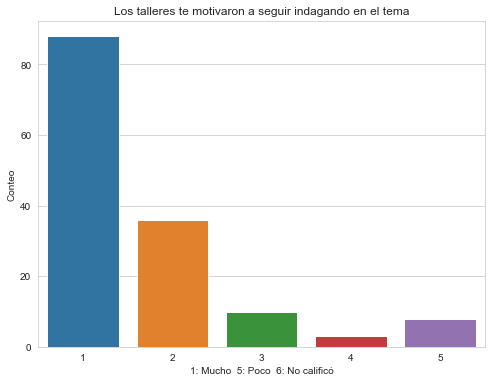

In [63]:
# estilo de graficacion
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')

# grafico
g = sns.countplot(data=encuestas_c, x=8)

# etiquetas
g.set(xlabel='1: Mucho  5: Poco  6: No calificó',
      ylabel='Conteo',
      title=columnas_claves[8])

# mostramos
plt.show()

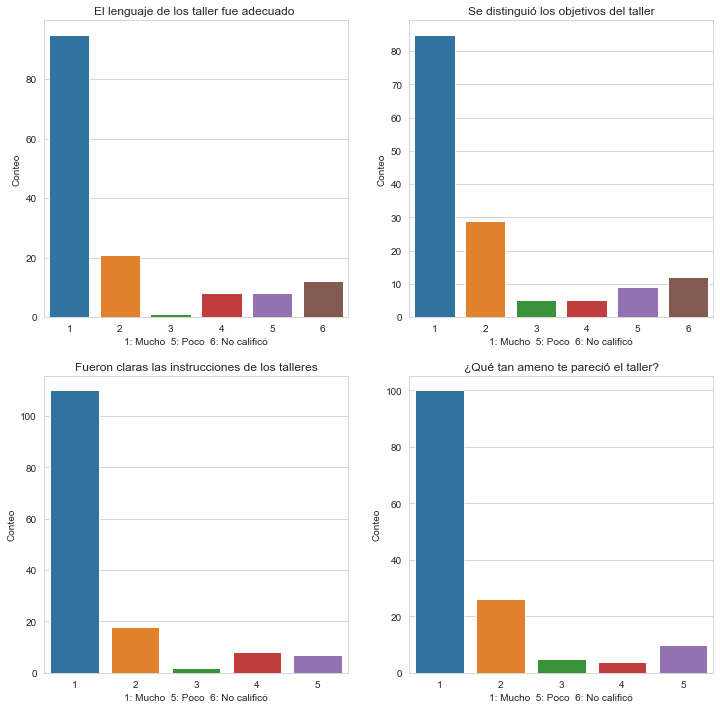

In [23]:
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(nrows=2, ncols=2,
                               figsize=(12,12))

# graficos
sns.countplot(data=encuestas_c, x=4, ax=ax0)
sns.countplot(data=encuestas_c, x=5, ax=ax1)
sns.countplot(data=encuestas_c, x=6, ax=ax2)
sns.countplot(data=encuestas_c, x=7, ax=ax3)

# etiquetas
ax0.set(xlabel='1: Mucho  5: Poco  6: No calificó',
      ylabel='Conteo',
      title=columnas_claves[4])
ax1.set(xlabel='1: Mucho  5: Poco  6: No calificó',
      ylabel='Conteo',
      title=columnas_claves[5])
ax2.set(xlabel='1: Mucho  5: Poco  6: No calificó',
      ylabel='Conteo',
      title=columnas_claves[6])
ax3.set(xlabel='1: Mucho  5: Poco  6: No calificó',
      ylabel='Conteo',
      title=columnas_claves[7])

plt.show()

Comprobamos que, en efecto, los talleres fueron muy buenos en general. De hecho, podemos clasificar los resultados de la encuesta como sigue

In [24]:
count_positivos = 0
count_neutros = 0
count_negativos = 0
count_no_votos = 0

# contaremos cuantos respondieron con un 1 y 2 para las preguntas de las columnas
# 4,5,6,7,8
# Asimismo, para los que contestaron con un 3, 4 y 5, y para los que no contestaron
for j in [4,5,6,7,8]:
    for i in range(len(encuestas_c)):
        if encuestas_c[j].iloc[i] <= 2:
            count_positivos += 1
        elif encuestas_c[j].iloc[i] == 3:
            count_neutros += 1
        elif encuestas_c[j].iloc[i] == 6:
            count_no_votos += 1
        else:
            count_negativos += 1

In [25]:
# veamos en un dataframe la informacion recabada
df_conteos = pd.DataFrame({"Tipo": ["Positivos", "Neutros", "Negativos", "No respondieron"],
                           "Valor": [count_positivos, count_neutros, count_negativos, 
                                     count_no_votos]})
df_conteos["Indice"] = range(4)
df_conteos = df_conteos[["Indice", "Tipo", "Valor"]]
df_conteos

,Indice,Tipo,Valor
0,0,Positivos,608
1,1,Neutros,23
2,2,Negativos,70
3,3,No respondieron,24


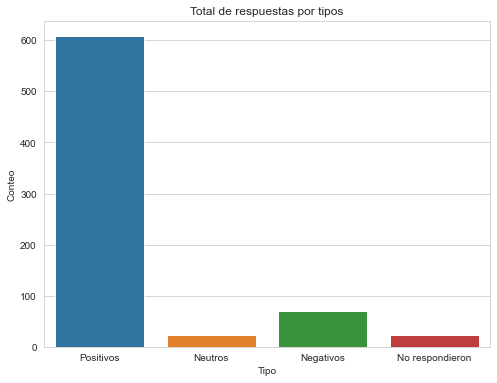

In [64]:
plt.figure(figsize=(8,6))
# Graficamente:

lista_aux = list(zip(list(df_conteos["Tipo"]), list(df_conteos["Valor"])))
aux = []

# Creamos una lista con el numero de elementos por cada tipo
for j in range(4):
    aux += [lista_aux[j][0] for i in range(lista_aux[j][1])] 

    # Dataframe auxiliar
df_conteos_aux = pd.DataFrame({"Tipo": aux})

# Graficamos
g = sns.countplot(data=df_conteos_aux, x="Tipo")
g.set(title="Total de respuestas por tipos",
      ylabel="Conteo")
plt.show()

Podemos ver el mismo gráfico para cada uno de los talleres, lo cual nos estaría dando el rendimiento por taller

In [27]:
def graficos(taller):
    # Filtramos por taller
    df = encuestas_c[encuestas_c[3] == taller]
    
    # Contamos cuantas respuestas por tipo obtuvo
    count_positivos = 0
    count_neutros = 0
    count_negativos = 0
    count_no_votos = 0
    
    for j in [4,5,6,7,8]:
        for i in range(len(df)):
            if df[j].iloc[i] <= 2:
                count_positivos += 1
            elif df[j].iloc[i] == 3:
                count_neutros += 1
            elif df[j].iloc[i] == 6:
                count_no_votos += 1
            else:
                count_negativos += 1
                
    # Dataframe auxiliar         
    df_conteos = pd.DataFrame({"Tipo": ["Positivos", "Neutros", "Negativos", "No respondieron"],
                               "Valor": [count_positivos, count_neutros, count_negativos, 
                                         count_no_votos]})              
    df_conteos["Indice"] = range(4)
    df_conteos = df_conteos[["Indice", "Tipo", "Valor"]]

    lista_aux = list(zip(list(df_conteos["Tipo"]), list(df_conteos["Valor"])))
    aux = []

    # Creamos una lista con el numero de elementos por cada tipo
    for j in range(4):
        aux += [lista_aux[j][0] for i in range(lista_aux[j][1])] 

    # Dataframe auxiliar
    df_conteos_aux = pd.DataFrame({"Tipo": aux})

    # Graficamos
    g = sns.countplot(data=df_conteos_aux, x="Tipo")
    g.set(title="Total de respuestas por tipos",
          ylabel="Conteo",
          xlabel=f'Taller={taller}')

In [28]:
# listado con los nombres de los talleres
nombres = list(encuestas_c[3].unique())
nombres

['serpientes estocasticas y escaleras aleatorias',
 'logica y sudoku',
 'cartas en set',
 'bingo del multiverso',
 'juntos con conjuntos',
 'carrera de probabilidades con mario kart',
 'los caminos del infinito (no son como yo pensaba)',
 'aliens mentirosos',
 'un algoritmo para calcular el dia del fin del mundo',
 'juego del grafimar',
 '¿leonardo di caprio es perfecto?',
 'scrampty',
 'maquina para transformar cafe en teoremas',
 'toros y vacas',
 'sin especificar']

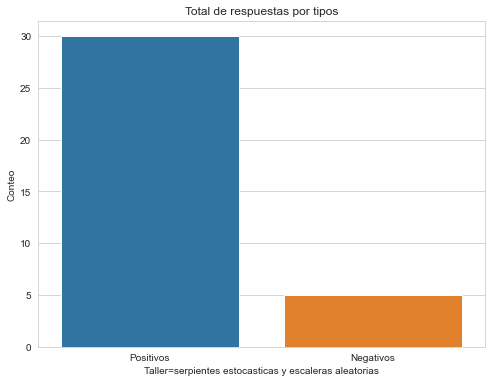

In [65]:
# Por ejemplo
plt.figure(figsize=(8,6))
graficos(nombres[0])

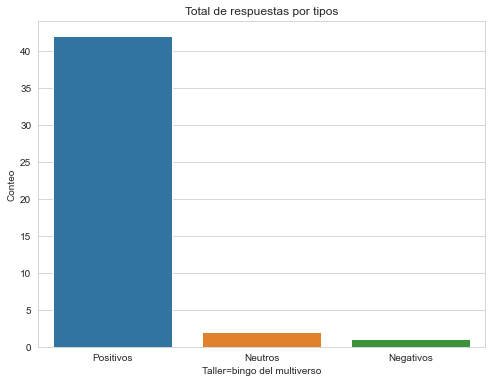

In [66]:
plt.figure(figsize=(8,6))
graficos(nombres[3])

Calculando el porcentaje de cada tipo para cada taller, podemos obtener los mejores talleres calificados

In [31]:
def info(taller):
    # Filtramos por taller
    df = encuestas_c[encuestas_c[3] == taller]
    
    # Contamos cuantas respuestas por tipo obtuvo
    count_positivos = 0
    count_neutros = 0
    count_negativos = 0
    count_no_votos = 0
    for j in [4,5,6,7,8]:
        for i in range(len(df)):
            if df[j].iloc[i] <= 2:
                count_positivos += 1
            elif df[j].iloc[i] == 3:
                count_neutros += 1
            elif df[j].iloc[i] == 6:
                count_no_votos += 1
            else:
                count_negativos += 1
                
    # Dataframe auxiliar         
    df_conteos = pd.DataFrame({"Tipo": ["Positivos", "Neutros", "Negativos", "No respondieron"],
                               "Valor": [count_positivos, count_neutros, count_negativos, 
                                         count_no_votos]})              
    df_conteos["Indice"] = range(4)
    # Calculo del porcentaje
    df_conteos = df_conteos[["Indice", "Tipo", "Valor"]]
    df_conteos["Porcentaje"] = (df_conteos["Valor"] * 100) / df_conteos["Valor"].sum()
    df_conteos["Taller"] = [taller for i in range(len(df_conteos))]
    
    return df_conteos

# Por ejemplo
info(nombres[0])

,Indice,Tipo,Valor,Porcentaje,Taller
0,0,Positivos,30,85.714286,serpientes estocasticas y escaleras aleatorias
1,1,Neutros,0,0.000000,serpientes estocasticas y escaleras aleatorias
2,2,Negativos,5,14.285714,serpientes estocasticas y escaleras aleatorias
3,3,No respondieron,0,0.000000,serpientes estocasticas y escaleras aleatorias


In [32]:
# Creamos un solo dataframe como el anterior para todos los talleres
df_porcentajes = pd.concat([info(nombres[i]) for i in range(len(nombres))])
df_porcentajes[df_porcentajes["Porcentaje"] > 90]

,Indice,Tipo,Valor,Porcentaje,Taller
0,0,Positivos,15,100.000000,logica y sudoku
0,0,Positivos,5,100.000000,cartas en set
0,0,Positivos,42,93.333333,bingo del multiverso
0,0,Positivos,55,91.666667,los caminos del infinito (no son como yo pensaba)
0,0,Positivos,56,93.333333,juego del grafimar
0,0,Positivos,65,100.000000,¿leonardo di caprio es perfecto?
0,0,Positivos,29,96.666667,toros y vacas


Tenemos varios talleres que fueron muy buenos y, en particular, 3 que fueron excelentes

In [33]:
df_porcentajes[df_porcentajes["Porcentaje"] == 100][["Valor", "Porcentaje", "Taller"]]

,Valor,Porcentaje,Taller
0,15,100.0,logica y sudoku
0,5,100.0,cartas en set
0,65,100.0,¿leonardo di caprio es perfecto?


de donde, el taller **¿leonardio di caprio es perfecto?** fue el mejor, debido a su porcentaje de positivos y a que obtuve un valor total de 65 respuestas positivas.

Veamos los talleres con menor calificaciones de positivos

In [34]:
df_porcentajes[df_porcentajes["Tipo"] == "Positivos"].sort_values("Porcentaje")

,Indice,Tipo,Valor,Porcentaje,Taller
0,0,Positivos,38,58.461538,juntos con conjuntos
0,0,Positivos,40,66.666667,sin especificar
0,0,Positivos,38,69.090909,un algoritmo para calcular el dia del fin del ...
0,0,Positivos,27,77.142857,scrampty
0,0,Positivos,58,82.857143,carrera de probabilidades con mario kart
0,0,Positivos,30,85.714286,serpientes estocasticas y escaleras aleatorias
0,0,Positivos,83,87.368421,maquina para transformar cafe en teoremas
0,0,Positivos,27,90.000000,aliens mentirosos
0,0,Positivos,55,91.666667,los caminos del infinito (no son como yo pensaba)
0,0,Positivos,42,93.333333,bingo del multiverso


Y los que más respuestas negativas obtuvieron

In [35]:
df_porcentajes[df_porcentajes["Tipo"] == "Negativos"].sort_values("Porcentaje", ascending=False)

,Indice,Tipo,Valor,Porcentaje,Taller
2,2,Negativos,17,28.333333,sin especificar
2,2,Negativos,12,21.818182,un algoritmo para calcular el dia del fin del ...
2,2,Negativos,7,20.000000,scrampty
2,2,Negativos,5,14.285714,serpientes estocasticas y escaleras aleatorias
2,2,Negativos,10,14.285714,carrera de probabilidades con mario kart
2,2,Negativos,9,9.473684,maquina para transformar cafe en teoremas
2,2,Negativos,5,8.333333,los caminos del infinito (no son como yo pensaba)
2,2,Negativos,4,6.666667,juego del grafimar
2,2,Negativos,1,2.222222,bingo del multiverso
2,2,Negativos,0,0.000000,logica y sudoku


Concluyendo que el taller **un algoritmo para calcular el dia del fin del mundo** fue el taller con menor rendimiento.

Ahora bien, el análisis hecho antes es el referente a la primera parte del curso propedéutico, que fue la impartición del taller donde se vieron los temas de manera intuitiva. Luego, la siguiente parte (las columnas 10,11,12,13 y 14) corresponde a la segunda parte del curso, donde se abordaron los temas vistos en el taller, pero ahora de manera más concreta y formal. Así, continuaremos el análisis para el resto de las columnas.

### Parte dos: Secuencia didáctica <a id="p32"></a>

Para esta parte efectuaremos exactamente el mismo análisis hecho respecto a los talleres, pero ahora para las secuencias didácticas, esto es, analizaremos la información en las columnas de la 10 a la 14. Para estos casos solo tenemos dos etiquetas: 1 (Mucho) y 0 (Poco).

Comenzaremos viendo que

In [36]:
print(encuestas_c[10].unique())
print("-" * len(columnas_claves[10]))
print(columnas_claves[10])

[1]
-------------------------------------------------------------
El lenguaje de las secuencias didácticas te pareció apropiado


El lenguaje de las secuencias para todos los taller fue Muy claro, pues no se obtuvo ningún registro con 0 (Poco). Se concluye que las secuencias didácticas del curso manejaron un lenguaje muy apropiado.

Continuando

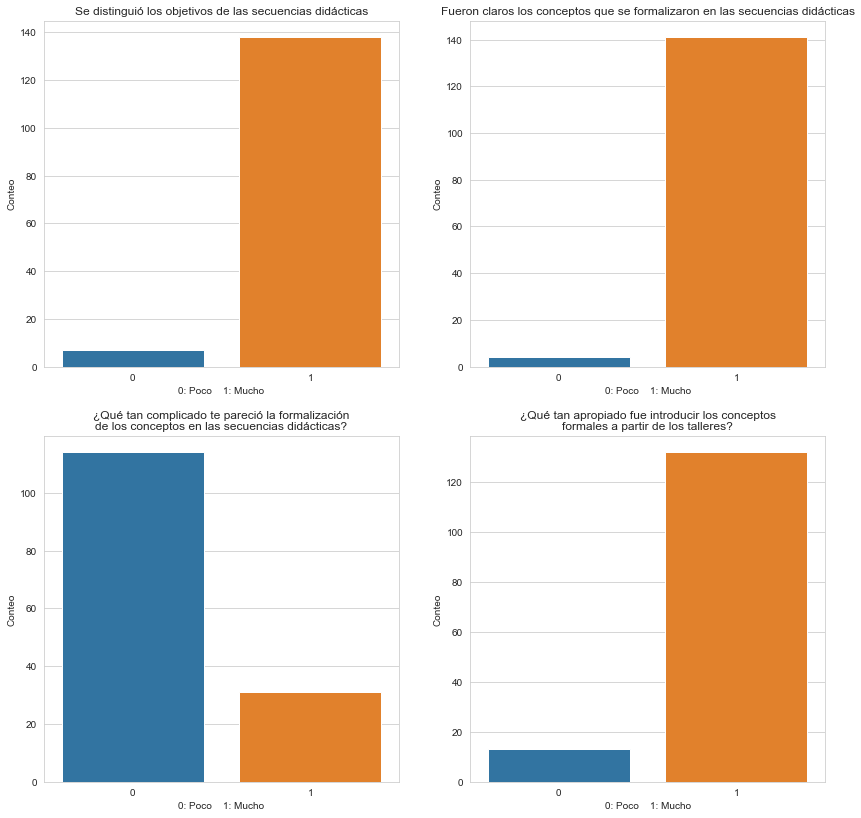

In [37]:
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(nrows=2, ncols=2,
                               figsize=(14,14))
msj13 = "¿Qué tan complicado te pareció la formalización\nde los conceptos en las secuencias didácticas?"
msj14 = "¿Qué tan apropiado fue introducir los conceptos\nformales a partir de los talleres?"


# graficos
sns.countplot(data=encuestas_c, x=11, ax=ax0)
sns.countplot(data=encuestas_c, x=12, ax=ax1)
sns.countplot(data=encuestas_c, x=13, ax=ax2)
sns.countplot(data=encuestas_c, x=14, ax=ax3)

# etiquetas
ax0.set(xlabel="0: Poco    1: Mucho",
      ylabel='Conteo',
      title=columnas_claves[11])
ax1.set(xlabel="0: Poco    1: Mucho",
      ylabel='Conteo',
      title=columnas_claves[12])
ax2.set(xlabel="0: Poco    1: Mucho",
      ylabel='Conteo',
      title=msj13)
ax3.set(xlabel="0: Poco    1: Mucho",
      ylabel='Conteo',
      title=msj14)

plt.show()

Se deduce que:

* Los conceptos formalizados en las secuencias didácticas fueron muy claros y que además los objetivos se lograron distinguir.
* En general, a los estudiantes no les pareció tan complicado la formalización de los temas vistos en las secuencias didácticas, aunque sí hubo una pequeña parte de los mismos a los cuales se les dificultó.
* En general, los estudiantes consideran que fue buena idea introducir los temas formales a partir de ideas intuitivas vistas en lso talleres.

Veamos ahora cuáles fueron los talleres que obtuvieron mejor o peor rendimiento para las secuencias didácticas: 

In [38]:
def info_2(taller):
    # Filtramos por taller
    df = encuestas_c[encuestas_c[3] == taller]
    
    # Contamos cuantas respuestas por tipo obtuvo
    count_positivos = 0
    count_negativos = 0
    # Omitimos las columnas 10 y 13 
    for j in [11,12,14]:
        for i in range(len(df)):
            if df[j].iloc[i] == 1:
                count_positivos += 1
            else:
                count_negativos += 1
                
    # Dataframe auxiliar         
    df_conteos = pd.DataFrame({"Tipo": ["Positivos", "Negativos"],
                               "Valor": [count_positivos, count_negativos]})              
    df_conteos["Indice"] = range(2)
    
    # Calculo del porcentaje
    df_conteos = df_conteos[["Indice", "Tipo", "Valor"]]
    df_conteos["Porcentaje"] = (df_conteos["Valor"] * 100) / df_conteos["Valor"].sum()
    df_conteos["Taller"] = [taller for i in range(len(df_conteos))]
    return df_conteos

# Creamos un solo dataframe como el anterior para todos los talleres
df_porcentajes_2 = pd.concat([info_2(nombres[i]) for i in range(len(nombres))])
df_porcentajes_2

,Indice,Tipo,Valor,Porcentaje,Taller
0,0,Positivos,20,95.238095,serpientes estocasticas y escaleras aleatorias
1,1,Negativos,1,4.761905,serpientes estocasticas y escaleras aleatorias
0,0,Positivos,8,88.888889,logica y sudoku
1,1,Negativos,1,11.111111,logica y sudoku
0,0,Positivos,3,100.000000,cartas en set
1,1,Negativos,0,0.000000,cartas en set
0,0,Positivos,27,100.000000,bingo del multiverso
1,1,Negativos,0,0.000000,bingo del multiverso
0,0,Positivos,36,92.307692,juntos con conjuntos
1,1,Negativos,3,7.692308,juntos con conjuntos


In [39]:
df_porcentajes_2[df_porcentajes_2["Tipo"] == "Positivos"].sort_values("Porcentaje", ascending=False)

,Indice,Tipo,Valor,Porcentaje,Taller
0,0,Positivos,3,100.000000,cartas en set
0,0,Positivos,27,100.000000,bingo del multiverso
0,0,Positivos,56,98.245614,maquina para transformar cafe en teoremas
0,0,Positivos,38,97.435897,¿leonardo di caprio es perfecto?
0,0,Positivos,20,95.238095,serpientes estocasticas y escaleras aleatorias
0,0,Positivos,40,95.238095,carrera de probabilidades con mario kart
0,0,Positivos,20,95.238095,scrampty
0,0,Positivos,34,94.444444,los caminos del infinito (no son como yo pensaba)
0,0,Positivos,34,94.444444,juego del grafimar
0,0,Positivos,17,94.444444,toros y vacas


Notamos que hubo dos talleres que obtuvieron puntaje perfecto, aunque el taller **cartas en set** solo tuvo tres valores por lo cual no podríamos considerarlo como el mejor taller respecto a las secuencias didácticas. Caso contrario, el taller **maquina para transformar cafe en teoremas** obtuvo un valor alto de respuestas positivas. Se concluye que dicho taller es candidato a ser el mejor en las secuencias didácticas junto con **¿leonardo di caprio es perfecto?** y **serpientes estocasticas y escaleras aleatorias**. Para finalizar el análisis veamos los valores obtenidos en la columna 13

In [40]:
columnas_claves[13]

'¿Qué tan complicado te pareció la formalización de los conceptos en las secuencias didácticas?'

In [41]:
def info_3(taller):
    # Filtramos por taller
    df = encuestas_c[encuestas_c[3] == taller]
    
    # Contamos cuantas respuestas por tipo obtuvo
    count_positivos = 0
    count_negativos = 0

    for i in range(len(df)):
        # En este caso el 1 es negativo y el 0 es positivo
        if df[13].iloc[i] == 1:
            count_negativos += 1
        else:
            count_positivos += 1
                
    # Dataframe auxiliar         
    df_conteos = pd.DataFrame({"Tipo": ["Positivos", "Negativos"],
                               "Valor": [count_positivos, count_negativos]})              
    df_conteos["Indice"] = range(2)
    
    # Calculo del porcentaje
    df_conteos = df_conteos[["Indice", "Tipo", "Valor"]]
    df_conteos["Porcentaje"] = (df_conteos["Valor"] * 100) / df_conteos["Valor"].sum()
    df_conteos["Taller"] = [taller for i in range(len(df_conteos))]
    return df_conteos

# Creamos un solo dataframe como el anterior para todos los talleres
df_porcentajes_3 = pd.concat([info_3(nombres[i]) for i in range(len(nombres))])
df_porcentajes_3[df_porcentajes_2["Tipo"] == "Positivos"].sort_values("Porcentaje", ascending=False)

,Indice,Tipo,Valor,Porcentaje,Taller
0,0,Positivos,3,100.000000,logica y sudoku
0,0,Positivos,6,100.000000,aliens mentirosos
0,0,Positivos,12,92.307692,¿leonardo di caprio es perfecto?
0,0,Positivos,12,85.714286,carrera de probabilidades con mario kart
0,0,Positivos,11,84.615385,juntos con conjuntos
0,0,Positivos,16,84.210526,maquina para transformar cafe en teoremas
0,0,Positivos,7,77.777778,bingo del multiverso
0,0,Positivos,9,75.000000,los caminos del infinito (no son como yo pensaba)
0,0,Positivos,9,75.000000,juego del grafimar
0,0,Positivos,8,72.727273,un algoritmo para calcular el dia del fin del ...


de modo que los talleres que mejor abordaron la dificultad de los temas, es decir, los que hicieron que los temas no se vieran tan complicados, fueron: **aliens mentirosos** y **¿leonardo di caprio es perfecto?**.

Concluimos que el mejor taller en las secuencias didácticas fue **¿leonardo di caprio es perfecto?**.

### Parte tres: análisis global <a id="p33"></a>

Veamos ahora algunas métricas para evaluar de manera general al curso propedéutico, donde contaremos el número total de respuestas positivas y negativas almacenadas en el conjunto de datos. Para ello

In [42]:
def info_total(df=encuestas_c):    
    # Contamos cuantas respuestas por tipo se obtuvieron
    count_positivos = 0
    count_neutros = 0
    count_negativos = 0
    count_no_votos = 0
    count_positivos_seq = 0
    count_negativos_seq = 0
    
    # Para las columnas de la 4 a la 8 (correspondientes al taller):
    for j in [4,5,6,7,8]:
        for i in range(len(df)):
            if df[j].iloc[i] <= 2:
                count_positivos += 1
            elif df[j].iloc[i] == 3:
                count_neutros += 1
            elif df[j].iloc[i] == 6:
                count_no_votos += 1
            else:
                count_negativos += 1
                
    # Para las columnas de la  10 a la 14 (correspondientes a la secuencia):
    for j in [10,11,12,13,14]:
        for i in range(len(df)):
            if j != 13:
                if df[j].iloc[i] == 1:
                    count_positivos_seq += 1
                else:
                    count_negativos_seq += 1
            else:
                if df[j].iloc[i] == 1:
                    count_negativos_seq += 1
                else:
                    count_positivos_seq += 1
                
    # obtenemos el total de positivos y negativos
    total_pos = count_positivos + count_positivos_seq
    total_neg = count_negativos + count_negativos_seq
    
    # Dataframe auxiliar para las columnas de la 4 a la 8        
    df_conteos = pd.DataFrame({"Tipo": ["Positivos", "Neutros", "Negativos", "No respondieron"],
                               "Valor": [count_positivos, count_neutros, count_negativos, 
                                         count_no_votos]})              
    df_conteos["Indice"] = range(4)
    # Calculo del porcentaje
    df_conteos = df_conteos[["Indice", "Tipo", "Valor"]]
    df_conteos["Porcentaje"] = (df_conteos["Valor"] * 100) / df_conteos["Valor"].sum()
    
    # Dataframe auxiliar para las columnas de la 10 a la 14        
    df_conteos_seq = pd.DataFrame({"Tipo": ["Positivos", "Negativos"],
                               "Valor": [count_positivos_seq, count_negativos_seq]})              
    df_conteos_seq["Indice"] = range(2)
    
    # Calculo del porcentaje
    df_conteos_seq = df_conteos_seq[["Indice", "Tipo", "Valor"]]
    df_conteos_seq["Porcentaje"] = (df_conteos_seq["Valor"] * 100) / df_conteos_seq["Valor"].sum()
    
    return df_conteos, df_conteos_seq, total_pos, total_neg

In [43]:
df1, df2, pos, neg = info_total()

print("Información de los talleres")
display(df1)
print("-" * 40)
print("Información de las secuencias didácticas")
display(df2)
print("-" * 40)
print(f"Total de positivos: {pos}\nTotal de negativos: {neg}")

Información de los talleres


,Indice,Tipo,Valor,Porcentaje
0,0,Positivos,608,83.862069
1,1,Neutros,23,3.172414
2,2,Negativos,70,9.655172
3,3,No respondieron,24,3.310345


----------------------------------------
Información de las secuencias didácticas


,Indice,Tipo,Valor,Porcentaje
0,0,Positivos,670,92.413793
1,1,Negativos,55,7.586207


----------------------------------------
Total de positivos: 1278
Total de negativos: 125


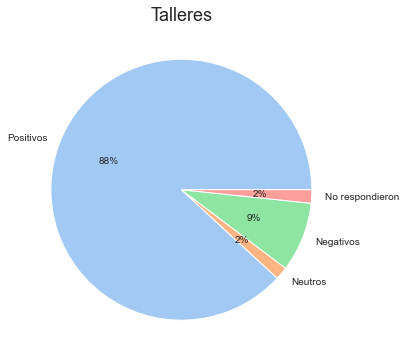

In [84]:
plt.figure(figsize=(8,6))

# graficamente
colors = sns.color_palette('pastel')[0:4]

plt.pie(df1.Valor, labels=df1.Tipo, colors=colors, autopct='%.0f%%')
plt.title("Talleres", size=18)
plt.show()

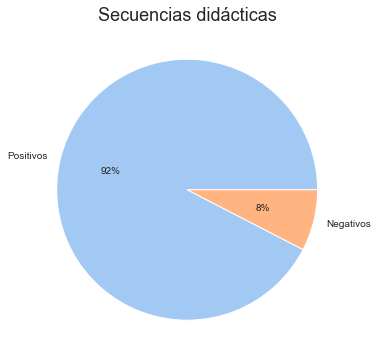

In [68]:
plt.figure(figsize=(8,6))
plt.pie(df2.Valor, labels=df2.Tipo, colors=colors, autopct='%.0f%%')
plt.title("Secuencias didácticas", size=18)
plt.show()

Unimos la información de los talleres y las secuencias didácticas:

In [46]:
# Actualizamos la informacion
df1.loc[0, "Valor"] = 608 + 670
df1.loc[2, "Valor"] = 70 + 55
df1["Porcentaje"] = (df1["Valor"] * 100) / df1["Valor"].sum()
df1

,Indice,Tipo,Valor,Porcentaje
0,0,Positivos,1278,88.137931
1,1,Neutros,23,1.586207
2,2,Negativos,125,8.620690
3,3,No respondieron,24,1.655172


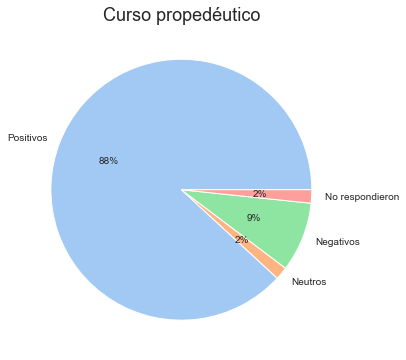

In [69]:
plt.figure(figsize=(8,6))

# Graficamente
plt.pie(df1.Valor, labels=df1.Tipo, colors=colors, autopct='%.0f%%')
plt.title("Curso propedéutico", size=18)
plt.show()

Lo que nos dice que el curso fue, en general, muy bueno.

### Parte cuatro: análisis de las asistencias <a id="p34"></a>

Veremos ahora un análisis sobre el comportamiento de las asistencias de los estudiantes en los días del curso propedéutico. Para ello cargaremos el siguiente conjunto de datos:

In [86]:
asistencias = pd.read_csv('https://cursopypagina.github.io/CursoPy/Asistencias.csv')
asistencias.head(2)

,Unnamed: 0,Primer apellido,Segundo apellido,Nombre (s),Email,Email alterno,2022-07-18 00:00:00,2022-07-19 00:00:00,2022-07-20 00:00:00,2022-07-21 00:00:00,...,2022-07-25 00:00:00,2022-07-26 00:00:00,2022-07-27 00:00:00,2022-07-28 00:00:00,2022-07-29 00:00:00,2022-08-01 00:00:00,2022-08-02 00:00:00,2022-08-03 00:00:00,2022-08-04 00:00:00,2022-08-05 00:00:00
0,0,NaN,NaN,JACIR JEZHAELL,NaN,NaN,0,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,MANUEL ALEJANDRO,NaN,NaN,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Realizaremos una limpieza rápida y cambiaremos el nombre de las columnas para mayor facilidad

In [87]:
# Cambiamos el nombre de las columnas
asistencias.columns = [i for i in range(21)]

# Hacemos un filtrado de las columnas que utilizaremos en el analisis.
# Donde la columna:
# 6: hace alusion a las asistencias del dia 18 de julio del 2022 (lunes) y
# 10: hace alusion a las asistencias del dia 22 de julio del 2022 (viernes).
# Que corresponden a los dias en los cuales se impartieron los cursos propedeuticos
asistencias =  asistencias[[6,7,8,9,10]]
asistencias

,6,7,8,9,10
0,0,0,1,0.0,0.0
1,0,0,0,0.0,0.0
2,1,1,1,1.0,1.0
3,0,1,1,1.0,1.0
4,0,1,1,1.0,1.0
...,...,...,...,...,...
256,1,1,1,0.0,1.0
257,1,1,1,1.0,1.0
258,1,1,0,0.0,0.0
259,1,0,0,0.0,0.0


donde 1 representa que el estudiante sí entró a la clase de ese día y 0 representa una inasistencia. Luego

In [50]:
# vemos que tenemos valores nulos en las columnas 9 y 10
asistencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       261 non-null    int64  
 1   7       261 non-null    int64  
 2   8       261 non-null    int64  
 3   9       259 non-null    float64
 4   10      258 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 10.3 KB


In [51]:
asistencias[(asistencias[9].isna()) & (asistencias[10].isna())]

,6,7,8,9,10
98,12,11,12,NaN,NaN
178,16,15,15,NaN,NaN


Reemplazaremos los ``NaN`` por ceros, es decir, los contaremos como inasistencias:

In [88]:
asistencias = asistencias.fillna(0)
asistencias[(asistencias[9].isna()) & (asistencias[10].isna())]

,6,7,8,9,10


Luego, tenemos filas las cuales contienen el total de asistencias de un día para cierto taller

In [53]:
# por ejemplo
asistencias[asistencias[6] > 1]

,6,7,8,9,10
19,7,8,9,8.0,8.0
39,14,11,10,11.0,11.0
59,13,13,12,11.0,10.0
79,15,13,13,14.0,15.0
98,12,11,12,0.0,0.0
118,14,16,12,14.0,11.0
138,14,14,12,8.0,10.0
158,16,16,16,13.0,0.0
178,16,15,15,0.0,0.0
197,13,13,12,12.0,8.0


lo cual no queremos. Lo que queremos es tener únicamente los registros que indiquen una asistencia (1) o una inasistencia (0), en realidad las filas como las anteriores no serán de utilidad para nuestro análisis, de modo que las eliminaremos:

In [89]:
asistencias = asistencias[(asistencias[6] <= 1) & (asistencias[7] <= 1) & (asistencias[8] <= 1) & (asistencias[9] <= 1) & (asistencias[10] <= 1)]

In [90]:
# Veamos
asistencias

,6,7,8,9,10
0,0,0,1,0.0,0.0
1,0,0,0,0.0,0.0
2,1,1,1,1.0,1.0
3,0,1,1,1.0,1.0
4,0,1,1,1.0,1.0
...,...,...,...,...,...
256,1,1,1,0.0,1.0
257,1,1,1,1.0,1.0
258,1,1,0,0.0,0.0
259,1,0,0,0.0,0.0


In [91]:
# configuracion para ver advertencias en la salida
import warnings
warnings.filterwarnings("ignore")

# Convertimos todas las columnas a un mismo tipo de dato
for i in range(6,11):
    asistencias[i] = asistencias[i].astype("int64")
    
# veamos
asistencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 260
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   6       249 non-null    int64
 1   7       249 non-null    int64
 2   8       249 non-null    int64
 3   9       249 non-null    int64
 4   10      249 non-null    int64
dtypes: int64(5)
memory usage: 11.7 KB


In [92]:
asistencias

,6,7,8,9,10
0,0,0,1,0,0
1,0,0,0,0,0
2,1,1,1,1,1
3,0,1,1,1,1
4,0,1,1,1,1
...,...,...,...,...,...
256,1,1,1,0,1
257,1,1,1,1,1
258,1,1,0,0,0
259,1,0,0,0,0


Obtengamos el total de asistencias por día

In [58]:
asistencias.sum()

6     176
7     166
8     152
9     141
10    133
dtype: int64

In [59]:
dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes']
num_asistencias = list(asistencias.sum())

for i in range(5):
    print(f'Total de asistencias en {dias[i]}: {num_asistencias[i]}')

Total de asistencias en Lunes: 176
Total de asistencias en Martes: 166
Total de asistencias en Miercoles: 152
Total de asistencias en Jueves: 141
Total de asistencias en Viernes: 133


Tenemos que el total de filas en el dataframe ``asistencias``

In [93]:
asistencias.shape[0]

249

Es el número total de estudiantes inscritos en el curso propedéutico. De tal manera, podemos obtener el porcentaje de asistencias:

In [61]:
for i in range(5):
    print(f'Porcentaje de asistencias en {dias[i]}: {round(((num_asistencias[i] * 100) / 249), 2)}%')

Porcentaje de asistencias en Lunes: 70.68%
Porcentaje de asistencias en Martes: 66.67%
Porcentaje de asistencias en Miercoles: 61.04%
Porcentaje de asistencias en Jueves: 56.63%
Porcentaje de asistencias en Viernes: 53.41%


Vemos un comportamiento notorio decreciente. Gráficamente

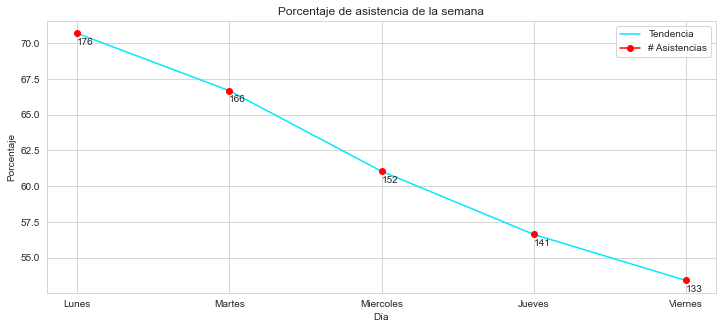

In [62]:
# Tamanio del grafico de 12px de largo por 5px de ancho
fig = plt.figure(figsize=(12,5))

# creamos una lista con los porcentajes
porcentajes = [round(((num_asistencias[i] * 100) / 249), 2) for i in range(5)]

# Grafico de dias versus porcentajes de asistencias
# Creara un grafico de lineas:
plt.plot(dias, porcentajes, color="#00E9FE")

# Graficaremos cada uno de los puntos (Lunes, 70.68),
# (Martes, 66.67), etc
for i in range(5):
    plt.plot(dias[i], porcentajes[i], marker="o", color="#FE0404")
    # Mostraremos etiquetas de texto en nuestro grafico
    # que contengan la informacion del numero de
    # asistencias totales por cada dia
    plt.text(dias[i], porcentajes[i]-0.8, num_asistencias[i])

plt.legend(["Tendencia", "# Asistencias"])
plt.ylabel("Porcentaje")
plt.xlabel("Día")
plt.title("Porcentaje de asistencia de la semana")
plt.show()

El cual es un comportamiento natural, esto es, los primeros días hay mayor número de asistencias respecto a los últimos. No obstante, también puede ser indicio de implementar estrategias para retener un mayor número de estudiantes a lo largo de las clases del curso.

## Conclusiones <a id="p4"></a>

In [70]:
columnas_claves

{0: 'Unnamed: 0',
 1: 'Marca temporal',
 2: 'Dirección de correo electrónico',
 3: 'Escribe el nombre del taller ',
 4: 'El lenguaje de los taller fue adecuado ',
 5: 'Se distinguió los objetivos del taller',
 6: 'Fueron claras las instrucciones de los talleres',
 7: '¿Qué tan ameno te pareció el taller?',
 8: 'Los talleres te motivaron a seguir indagando en el tema',
 9: 'Si tienes comentarios y/o sugerencias acerca de los talleres son bienvenidos.',
 10: 'El lenguaje de las secuencias didácticas te pareció apropiado',
 11: 'Se distinguió los objetivos de las secuencias didácticas',
 12: 'Fueron claros los conceptos que se formalizaron en las secuencias didácticas',
 13: '¿Qué tan complicado te pareció la formalización de los conceptos en las secuencias didácticas?',
 14: '¿Qué tan apropiado fue introducir los conceptos formales a partir de los talleres?',
 15: 'Si tienes comentarios y/o sugerencias son bienvenidos',
 16: 'El lenguaje de los talleres fue adecuado ',
 17: 'Se distingui

Respecto al taller, tenemos que en si gran mayoría se obtuvieron respuestas positivas, de modo que los talleres fueron claros en sus objetivos, manejaron un buen lenguaje, fueron claros, fueron claras las instrucciones y fueron amenos.

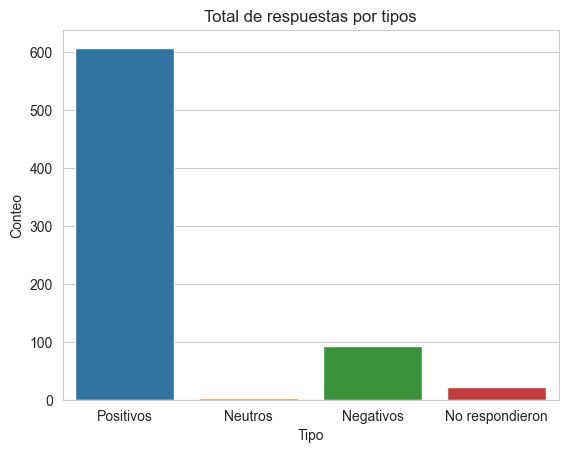

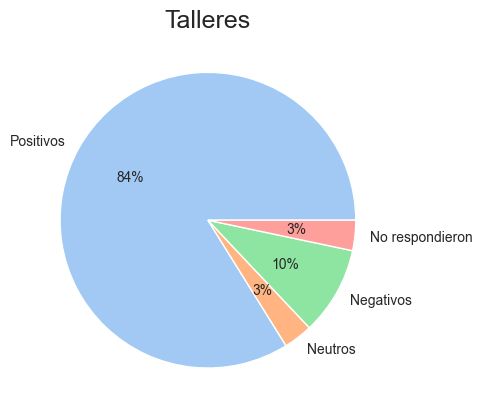

Teniendo un 84% de valores positivos en las encuestas y tan solo un 10% de valores negativos.

Respecto a las secuencias didácticas, se obtuvieron mejores resultados al escalar en un 92% con valores positivos y con solo 8% de negativos, sin tener valores neutros. 

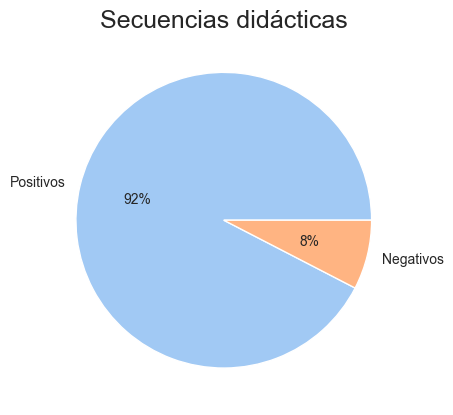

Lo cual nos dice que la introducción de los temas de manera intuitiva y después su formalización en las secuencias didácticas fue una metodología correcta, donde la mayoría opinó que dicho paso no fue difícil; donde el lenguaje manejado fue correcto y los objetivos fueron claros.

Respecto al curso en general

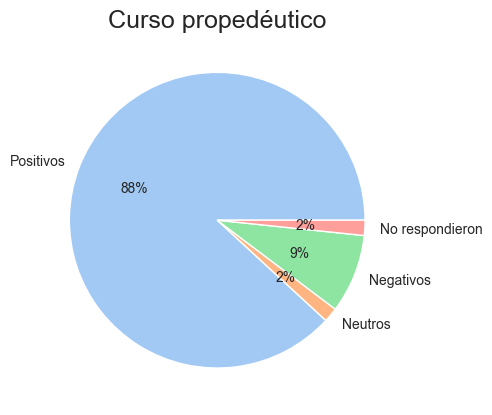

se obtuvieron resultados muy buenos al tener el 88% de valores positivos en las encuestas y tan solo el 9% de negativos.

Podríamos solucionar el problema de los que no respondieron colocando que todas las preguntas de la encuesta sean obligatorias de responder, o, dado que los valores a responder fueron 1,2,3,4,5 en el taller y Mucho o Poco en la secuencia, podríamos colocar opciones para seleccionar dichas respuestas, y así todas las preguntas serían respondidas.

Respecto a las asistencias

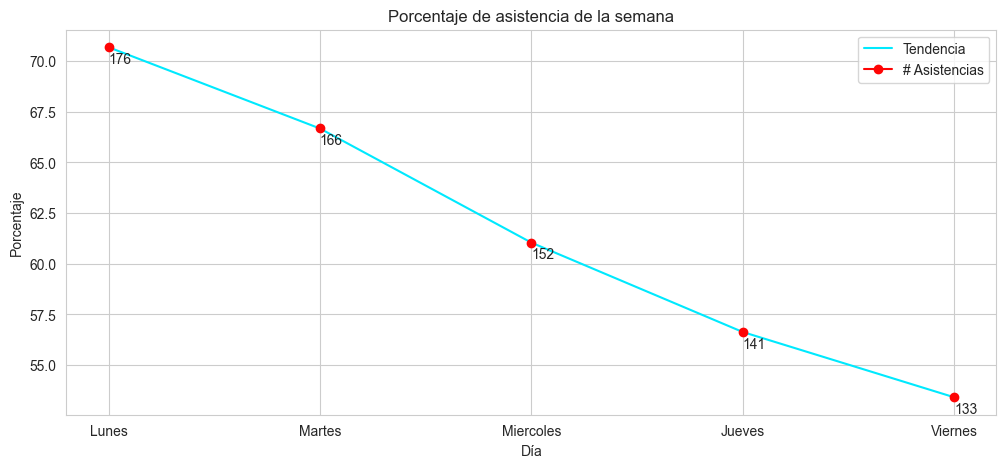

Lo cual es un decrecimiento natural para cualquier curso, no obstante, podrían implementarse estrategías para captar más estudiantes para las últimas clases.

---

## Exportaciones <a id="p5"></a>

Finalmente, exportamos tres dataframes:

In [79]:
# Porcentajes de valores positivos, negativos y neutros por cada taller 
df_porcentajes_export_taller = df_porcentajes.drop("Indice", axis=1)
df_porcentajes_export_secuencia = df_porcentajes_2.drop("Indice", axis=1)

In [80]:
# Exportamos
encuestas_c_export.to_csv("encuestas_clean.csv")
df_porcentajes_export_taller.to_csv("Porcentajes_taller.csv")
df_porcentajes_export_secuencia.to_csv("Porcentajes_secuencia.csv")

In [95]:
asistencias.to_csv("asistencias_clean.csv")

Antes de exportar la información de las encuestas escribimos:

In [118]:
# Creamos una copia de encuestas_c
encuestas_c_export = encuestas_c 

In [119]:
# Cambiaremos los valores de las columnas 4-8
# de ser 1,2,3,4,5,6 a 4 posibles categorias:
def clasificador_1(x):
    if x <= 2:
        return "Positivo"
    elif x == 3:
        return "Neutro"
    elif (x > 3) and (x <= 5):
        return "Negativo"
    else:
        return "No contesto"
    
# Cambiaremos los valores de las columnas 10-14 
# a dos posibles categorias
def clasificador_2(x):
    if x == 0:
        return "Poco"
    else:
        return "Mucho"
    
# Aplicamos
for i in range(4,9):
    encuestas_c_export[i] = encuestas_c_export[i].apply(lambda x: clasificador_1(x))
for i in range(10,15):
    encuestas_c_export[i] = encuestas_c_export[i].apply(lambda x: clasificador_2(x))
    
# Respuestas de las encuestas
encuestas_c_export = encuestas_c_export.reset_index().rename(columns={"index": "ID"})
encuestas_c_export

,ID,3,4,5,6,7,8,10,11,12,13,14
0,0,serpientes estocasticas y escaleras aleatorias,Positivo,Positivo,Positivo,Positivo,Positivo,Mucho,Mucho,Mucho,Poco,Poco
1,1,serpientes estocasticas y escaleras aleatorias,Positivo,Positivo,Positivo,Positivo,Positivo,Mucho,Mucho,Mucho,Mucho,Mucho
2,2,serpientes estocasticas y escaleras aleatorias,Negativo,Negativo,Negativo,Negativo,Negativo,Mucho,Mucho,Mucho,Mucho,Mucho
3,3,serpientes estocasticas y escaleras aleatorias,Positivo,Positivo,Positivo,Positivo,Positivo,Mucho,Mucho,Mucho,Poco,Mucho
4,4,serpientes estocasticas y escaleras aleatorias,Positivo,Positivo,Positivo,Positivo,Positivo,Mucho,Mucho,Mucho,Poco,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...
140,115,sin especificar,Positivo,Positivo,Positivo,Positivo,Positivo,Mucho,Mucho,Mucho,Poco,Mucho
141,116,sin especificar,Positivo,Positivo,Positivo,Positivo,Positivo,Mucho,Mucho,Mucho,Poco,Mucho
142,117,sin especificar,Positivo,Positivo,Positivo,Positivo,Positivo,Mucho,Mucho,Mucho,Poco,Mucho
143,129,sin especificar,Positivo,Positivo,Positivo,Positivo,Positivo,Mucho,Mucho,Mucho,Poco,Mucho


In [117]:
encuestas_c

,3,4,5,6,7,8,10,11,12,13,14
0,serpientes estocasticas y escaleras aleatorias,1,1,1,1,2,1,1,1,0,0
1,serpientes estocasticas y escaleras aleatorias,1,1,2,1,1,1,1,1,1,1
2,serpientes estocasticas y escaleras aleatorias,5,5,5,5,4,1,1,1,1,1
3,serpientes estocasticas y escaleras aleatorias,1,1,1,1,1,1,1,1,0,1
4,serpientes estocasticas y escaleras aleatorias,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
115,sin especificar,1,2,1,2,1,1,1,1,0,1
116,sin especificar,2,2,1,2,1,1,1,1,0,1
117,sin especificar,2,1,1,1,2,1,1,1,0,1
129,sin especificar,1,1,1,1,1,1,1,1,0,1


Finalmente exportamos

In [120]:
encuestas_c_export.to_csv("encuestas_clean_e.csv")

Exportaremos también el dataframe

In [122]:
df1

,Indice,Tipo,Valor,Porcentaje
0,0,Positivos,1278,88.137931
1,1,Neutros,23,1.586207
2,2,Negativos,125,8.620690
3,3,No respondieron,24,1.655172


In [123]:
df1_export = df1[["Tipo", "Valor"]]
df1_export.to_csv("Resumen_curso.csv")

Definimos el siguiente dataframe:

In [126]:
df_asis_total = pd.DataFrame({"Dias": dias, "Total_asistencias": num_asistencias})
df_asis_total

,Dias,Total_asistencias
0,Lunes,176
1,Martes,166
2,Miercoles,152
3,Jueves,141
4,Viernes,133


y lo exportamos

In [127]:
df_asis_total.to_csv("Total_asistencias.csv")

Exportaremos también los dataframes de los porcentajes por taller (para los talleres y para las secuencias didácticas)

In [133]:
df_porcentajes_export = df_porcentajes[["Taller", "Tipo", "Porcentaje"]]
df_porcentajes_export.to_csv("Porcentajes_taller.csv")

In [134]:
df_porcentajes_2_export = df_porcentajes_2[["Taller", "Tipo", "Porcentaje"]]
df_porcentajes_2_export.to_csv("Porcentajes_secuencia.csv")

Exportamos los porcentajes generales de los talleres y las secuencias

In [139]:
df1_export = df1[["Tipo", "Porcentaje"]]
df2_export = df2[["Tipo", "Porcentaje"]]

df1_export.to_csv("Resumen_taller.csv")
df2_export.to_csv("Resumen_secuencia.csv")